<a href="https://colab.research.google.com/github/cdstreiff/MAT421---Applied-Computational-Methods/blob/main/MAT421SectionEpart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section E HW Part 1 - MAT 421
Carson Streiff - Spring 2022

## Approximation of first derivative
This program uses the formal definition of the derivitive to create a better and better approximation of the slope of the tangent line at the given x value. The final approximation is indicated by the red line.

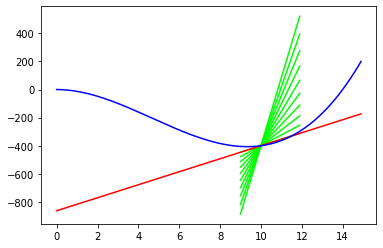

In [149]:
import numpy as np
import matplotlib.pyplot as plt



f_domain = np.arange(0,15,0.1)

f = lambda x: x**3 - 14*(x**2)
f_range = f(f_domain)

epsilon = 0.1

x0 = 10
h = 15



while(h > 0):
  deriv = ( f(x0 + h) - f(x0) ) / h

  domain = np.arange(9,12,0.1)

  g = lambda x: deriv*(x-10) - 400
  
  range = g(domain)

  plt.plot(domain,range,'lime')

  h -= 1.5


domain = np.arange(0,15,0.1)
range = g(domain)
plt.plot(domain,range,'r')

plt.plot(f_domain,f_range,'b')

## Partial derivative calculation
This code calculates the partial derivative in three directions of a given (three variable) function at a certain point, using the limit formula to the accuracy of a supplied h.

In [150]:
from numpy.core.numeric import identity

def partial_deriv(func,x,y,z):

  f = func

  h = 0.0001

  #partial with respect to x @ x0

  x_deriv = ( f(x+h,y,z) - f(x,y,z) ) / h

  print("partial with respect to x: " +  str(x_deriv))


  #partial with respect to y @ x0
  y_deriv = ( f(x,y+h,z) - f(x,y,z) ) / h

  print("partial with respect to y: " +  str(y_deriv))


  #partial with respect to z @ x0
  z_deriv = ( f(x,y,z+h) - f(x,y,z) ) / h

  print("partial with respect to z: " +  str(z_deriv))



f = lambda x,y,z: 3*x*y + (x**2)*y + z**2
x = 0.5
y = 2.6
z = 1.1

partial_deriv(f,x,y,z)


partial with respect to x: 10.400259999991945
partial with respect to y: 1.7499999999959215
partial with respect to z: 2.200100000004923


## Taylor Series approximation
Below is a function that creates a Taylor series approximation (only polynomials in this case for simplicity) to a given function. The blue curve represents the given function, the red curve is the Taylor series approximation to the fourth derivative, and the green curve is the Taylor series approximation to the fifth derivative.

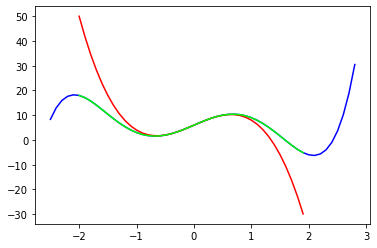

In [151]:
import numpy as np


def taylor_series(a,x,p,n):
  
  deriv1 = p.deriv()
  deriv2 = deriv1.deriv()
  deriv3 = deriv2.deriv()
  deriv4 = deriv3.deriv()
  deriv5 = deriv4.deriv()
  deriv6 = deriv5.deriv()

  value = p(a) + (x - a) * deriv1(a)/ np.math.factorial(1)
  value += (x - a)**2 * deriv2(a) / np.math.factorial(2)
  value += (x - a)**3 * deriv3(a) / np.math.factorial(3)
  value += (x - a)**4 * deriv4(a) / np.math.factorial(4)

  if(n==5):
    value += (x - a)**5 * deriv5(a) / np.math.factorial(5)

  return value


p = np.poly1d([1,0,-8,0,10,6])


x_values = np.arange(-2.5,2.9,0.1)
y_values = p(x_values)
plt.plot(x_values,y_values,'b')


x_new = np.arange(-2,2,0.1)
y_new = taylor_series(0,x_new,p,0)
plt.plot(x_new,y_new,'r')

x_new = np.arange(-2,2,0.1)
y_new = taylor_series(0,x_new,p,5)
plt.plot(x_new,y_new,'lime')

## Relative minimum/maximum

We begin with the equation f(x,y) = (x^2)y + x^2 + y^2

Deriving with respect to x gives df/dx = 2xy + 2x
Setting this equal to zero yields 0 = x(2y+2)
Therefore the partial derivative with respect to x is zero at x = 0 and y = -1

Deriving with respect to y gives df/dy = x^2 + 2y
Setting equal to zero gives x^2 = -2y

Substituting x = 0 we get y = 0
Substituting y = -1 we get x = +- sqrt(2)

These are the three critical points, candidates for being a max or min.

With our second partial derivatives:

f_xx =  2y + 2
f_yy = 2
f_xy = 2x


We take the Hessian

H = f_xx * f_yy - (f_xy)^2

H(0,0) = (2*0 + 2) * (2) - (2(0))^2 = 4

H(sqrt(2),-1) = (2(-1) + 2) * 2 - (2*sqrt(2))^2 = -8

H(-sqrt(2),-1) = (2(-1) + 2) * 2 - (2*-sqrt(2))^2 = -8

Since H is negative, (+-sqrt(2),-1) are both saddle points.

Since f_xx(0,0) = 2 > 0 , f has a relative minimum at (0,0)


The code below plots the points along with a wireframe representation of f.


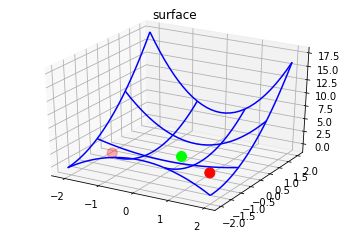

In [152]:
def f(x, y):
    return (x**2)*y + x**2 + y**2

x = np.linspace(-2.1, 2, 30)
y = np.linspace(-2, 2, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

saddles_x = np.array([np.sqrt(2),-np.sqrt(2)])
saddles_y = np.array([-1,-1])
saddles_z = f(saddles_x,saddles_y)


ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z,rstride=10,cstride=10, color='blue')
ax.set_title('surface');
ax.scatter3D(saddles_x,saddles_y,saddles_z,s=100, color='r');
ax.scatter3D(0,0,f(0,0),s=100, color='lime');